# Image to Pencil Sketch App

# Step 1: Install OpenCV

In [1]:
!pip install opencv-python

# Step 2: Import Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import glob
import os
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Function to convert image to pencil sketch

In [2]:
def convert_to_sketch(img):
    grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    invert_img = cv2.bitwise_not(grey_img)
    blur_img = cv2.GaussianBlur(invert_img, (111, 111), 0)
    invblur_img = cv2.bitwise_not(blur_img)
    sketch_img = cv2.divide(grey_img, invblur_img, scale=256.0)
    return sketch_img

# Function to display image with optional title

In [3]:
def display_image(image, title=None):
    plt.imshow(image, cmap='gray')
    plt.axis(False)
    if title:
        plt.title(title)
    plt.show()

# Step 3: Load and Display the Original Image

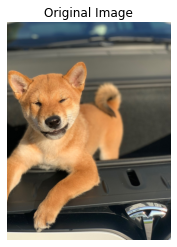

In [4]:
Tk().withdraw() 

image_path = askopenfilename(filetypes=[("Image Files", "*.jpg;*.jpeg;*.png")]) 
img = cv2.imread(image_path)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

display_image(RGB_img, 'Original Image')

# Step 4: Convert Image to a Pencil Sketch

In [5]:
sketch_img = convert_to_sketch(img)

# Step 5: Save and Display the Sketch

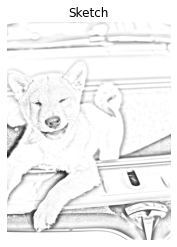

In [6]:
sketch_output_path = os.path.splitext(image_path)[0] + '_sketch.png'
cv2.imwrite(sketch_output_path, sketch_img)

display_image(sketch_img, 'Sketch')

# Step 6: Display Original Image and Sketch Side by Side

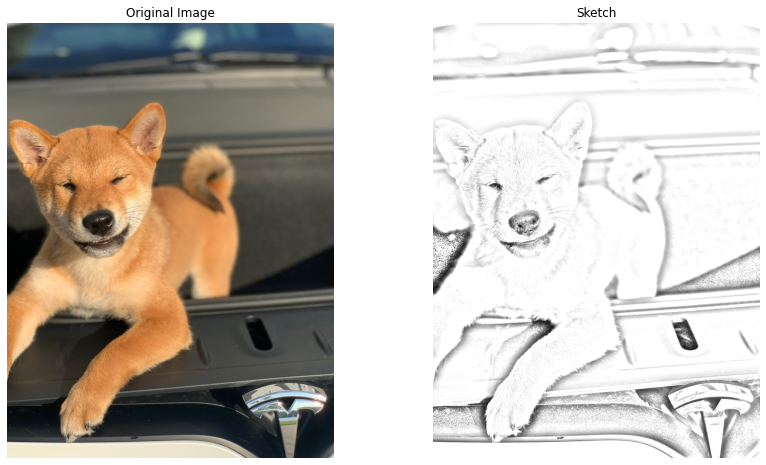

In [7]:
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
plt.imshow(RGB_img)
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sketch_img, cmap='gray')
plt.axis('off')
plt.title('Sketch')

plt.show()